In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Load dataset

In [2]:
fake_data=pd.read_csv(r"C:\Users\Hp\Documents\Fake News Detection\News _dataset\Fake.csv")
real_data=pd.read_csv(r"C:\Users\Hp\Documents\Fake News Detection\News _dataset\True.csv")

Data Analysis

In [3]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
real_data.shape

(21417, 4)

In [5]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
real_data.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


Now,For Fake only

In [7]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake_data.shape

(23481, 4)

In [9]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
fake_data.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


Checking Missing Values

In [11]:
real_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
fake_data['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [14]:
real_data['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

Create target column and concat two dataframes into one

In [15]:
real_data['target']=1
fake_data['target']=0

df=pd.concat([real_data,fake_data],axis=0)
df.head(40000)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
18578,CHOKING ON HER LIES? HILLARY CLINTON Has Cough...,Hillary Clinton was delivering the commencemen...,left-news,"May 26, 2017",0
18579,CNN’S DON LEMON Tries to Blame Trump…Cuts Off ...,Don Lemon tries to blame Donald Trump for the ...,left-news,"May 26, 2017",0
18580,CONSEQUENCES OF LIBERAL TOLERANCE: He Had An I...,Terrified concert goers fled an Ariana Grande ...,left-news,"May 25, 2017",0
18581,LIST OF 3 COMPANIES WHO Caved To Leftists…PULL...,"Companies including Cars.com, Peloton, and Lee...",left-news,"May 25, 2017",0


Data Shape

In [16]:
df.shape

(44898, 5)

Check Duplicates


In [17]:
df.duplicated().sum()

209

Drop Duplicate Rows

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

Drop Columns

In [20]:
df = df.drop(['title', 'subject','date'],axis=1)
df.isnull().sum()

text      0
target    0
dtype: int64

Shuffling df

In [21]:
df=df.sample(frac = 1)
df.head(10)

,text,target
11306,DUBAI (Reuters) - A Saudi Arabian businessman ...,1
22943,21st Century Wire says Here s an epic discussi...,0
10886,"Governor Scott Walker, R-Wis., is reacting jus...",0
9854,Major Hollywood liberal activist Rob Reiner is...,0
5916,President Obama just smacked down an attempt b...,0
18917,"BRIGHTON, England (Reuters) - A cliff-edge Bre...",1
2901,CHICAGO (Reuters) - A Democratic plan to end I...,1
22622,"Appear weak when you are strong, and strong w...",0
1293,Donald Trump s disastrous decision to take the...,0
12788,Tonight s debate questioning will start off ...,0


In [22]:
df.reset_index(inplace = True)
df.drop(["index"],axis=1,inplace=True)
df.head()

,text,target
0,DUBAI (Reuters) - A Saudi Arabian businessman ...,1
1,21st Century Wire says Here s an epic discussi...,0
2,"Governor Scott Walker, R-Wis., is reacting jus...",0
3,Major Hollywood liberal activist Rob Reiner is...,0
4,President Obama just smacked down an attempt b...,0


In [23]:
df['text'][3778]

'University of Virginia professor and political scientist Larry Sabato has just released his map predicting the electoral vote outcome of the 2016 election, and it forecasts a blowout win for the Democratic Party.Based on the likely nominees being Hillary Clinton and Donald Trump, Sabato currently forecasts a 347-191 electoral college victory for Clinton. Candidates need a majority of the 538 electoral votes in the United States to win, currently that number is 270.Sabato notes: Election analysts prefer close elections, but there was nothing we could do to make this one close. The predicted map looks very similar to 2012 s electoral map, but with North Carolina flipping from Republican to Democrat. In 2012, Mitt Romney won North Carolina, but just by 2.2%.Sabato also predicts a close race in other states that were previously Republican territory: Arizona, Missouri, Indiana, and Georgia. Notably, President Obama won Indiana in 2008, and the large black population in Georgia has had many

In [24]:
df['text'][93]

'WASHINGTON (Reuters) - President Donald Trump has signed off on sending 4,000 more troops to Afghanistan, Fox News reported on Monday, citing a senior U.S. official. The report comes before Trump addresses the nation on his strategy for Afghanistan at 9:00 p.m. EDT Monday (0100 GMT on Tuesday). '

In [25]:
df['text'][39000]

'TOKYO (Reuters) - Japan is hammering out plans to show U.S. President Donald Trump its firms are ready to create U.S. jobs, according to a document whose contents were revealed to Reuters, as Prime Minister Shinzo Abe prepares for a summit where automotive trade will be high on the agenda. Abe will visit Washington on Feb. 10 for the talks at which  Trump is expected to seek quick progress toward a two-way trade deal.  An early draft of the document, called “U.S.-Japan Growth and Employment Initiative”, listed five areas including  infrastructure. The document, which was read to Reuters, did not mention automotive trade, which Trump has targeted as “unfair” in an echo of complaints by Washington decades ago. The document left blanks for the numbers of jobs to be created and the scope of investment but a government source said several hundred thousand jobs could result. It also referred to the idea of buying dollar-denominated “infrastructure bonds”, a proposal that has been floated as

Text Preprocessing

Lowercase

In [26]:
df['text']=df['text'].str.lower()
df.head(10)

,text,target
0,dubai (reuters) - a saudi arabian businessman ...,1
1,21st century wire says here s an epic discussi...,0
2,"governor scott walker, r-wis., is reacting jus...",0
3,major hollywood liberal activist rob reiner is...,0
4,president obama just smacked down an attempt b...,0
5,"brighton, england (reuters) - a cliff-edge bre...",1
6,chicago (reuters) - a democratic plan to end i...,1
7,"appear weak when you are strong, and strong w...",0
8,donald trump s disastrous decision to take the...,0
9,tonight s debate questioning will start off ...,0


Remove Punctuation

In [27]:
import string

# Remove punctuation using lambda function
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Verify the changes
print(df.head())

                                                text  target
0  dubai reuters  a saudi arabian businessman who...       1
1  21st century wire says here s an epic discussi...       0
2  governor scott walker rwis is reacting just li...       0
3  major hollywood liberal activist rob reiner is...       0
4  president obama just smacked down an attempt b...       0


Remove Stopwords

In [28]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'text' column using a lambda function
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Verify the changes
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  target
0  dubai reuters saudi arabian businessman whose ...       1
1  21st century wire says epic discussion sunday ...       0
2  governor scott walker rwis reacting like fan s...       0
3  major hollywood liberal activist rob reiner ma...       0
4  president obama smacked attempt republican con...       0


Tokenization

In [29]:
from nltk.tokenize import word_tokenize
# Apply word tokenization using a lambda function
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

# Verify the changes
print(df.head())

                                                text  target
0  [dubai, reuters, saudi, arabian, businessman, ...       1
1  [21st, century, wire, says, epic, discussion, ...       0
2  [governor, scott, walker, rwis, reacting, like...       0
3  [major, hollywood, liberal, activist, rob, rei...       0
4  [president, obama, smacked, attempt, republica...       0


Stemmer

In [30]:
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Apply stemming using a lambda function
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Verify the changes
print(df.head())


                                                text  target
0  [dubai, reuter, saudi, arabian, businessman, w...       1
1  [21st, centuri, wire, say, epic, discuss, sund...       0
2  [governor, scott, walker, rwi, react, like, fa...       0
3  [major, hollywood, liber, activist, rob, reine...       0
4  [presid, obama, smack, attempt, republican, co...       0


Word Cloud

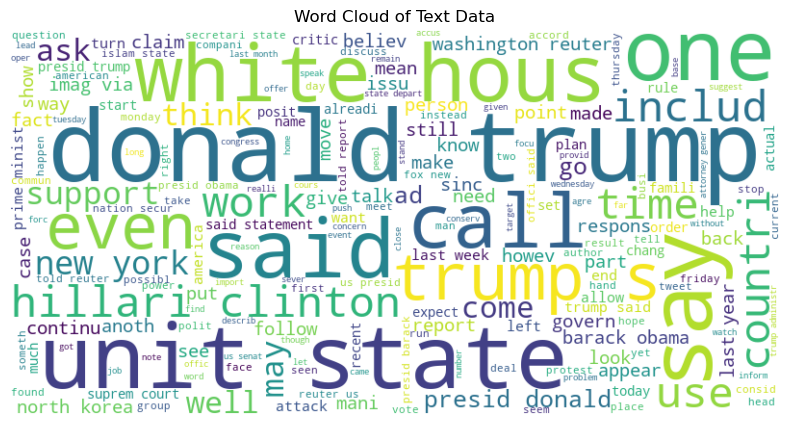

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join([' '.join(tokens) for tokens in df['text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Text Data')
plt.show()

In [36]:
# Save df to a CSV file
df.to_csv('News_Cleaned_data.csv', index=False)

Build Model

In [32]:
X=df["text"]
y=df["target"]

Trainig and Testing

In [33]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

Convert Text to Vector

In [34]:
X_train = [str(doc) for doc in X_train]
X_test = [str(doc) for doc in X_test]

# Now perform vectorization
# Now proceed with TF-IDF vectorization only on the training set
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer(encoding='utf-8',stop_words='english',max_df=0.5)
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)